## Loading the requuired libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Loading the dataset

In [2]:
sheet_id = '1TWNez8kF5LpTc0QF1UuYrdmLXxJhGV2mVTpjGU7Sbt0'
sheet_name = 'House_Rent_Prediction.csv'
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
df = pd.read_csv(url)

print('Shape of the dataset',df.shape)
df.head()

Shape of the dataset (20555, 25)


,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,9/10/2017 12:48,12.929557,77.672280,ANYONE,0,1,0,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,12/6/2018 22:02,12.982870,80.262012,FAMILY,0,1,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0


## Dropping duplicate rows

In [3]:
a=len(df)
print('Original dataframe length',a)
df.drop_duplicates(inplace=True)
b=len(df)
print('Dataframe length after dropping duplicate rows',b)
print('No of duplicate rows removed',a-b)

Original dataframe length 20555
Dataframe length after dropping duplicate rows 20523
No of duplicate rows removed 32


## Checking for 'null_count','unique_values','percent_of_null_values' in the dataset

In [4]:
pd.DataFrame({'dtypes':df.dtypes,'null_count':df.isnull().sum(),'unique_values':df.nunique(),
             'percent_of_null_values':df.isnull().mean()*100})

,dtypes,null_count,unique_values,percent_of_null_values
id,object,0,20523,0.000000
type,object,15,9,0.073089
locality,object,160,1917,0.779613
activation_date,object,23,19566,0.112069
latitude,float64,23,17733,0.112069
longitude,float64,23,17726,0.112069
lease_type,object,23,4,0.112069
gym,int64,0,2,0.000000
lift,int64,0,2,0.000000
swimming_pool,int64,0,2,0.000000


- We have less than 1% of null values in all columns, so I'll just drop the rows with missing values

In [5]:
# Dropping null rows

df.dropna(inplace=True)
print('shape before removing null_values:',b,'\n','shape after removing null_values:',df.shape)

shape before removing null_values: 20523 
 shape after removing null_values: (20357, 25)


### Checking for 'null_count','unique_values','percent_of_null_values' in the dataset after removing null values 

In [6]:
pd.DataFrame({'dtypes':df.dtypes,'null_count':df.isnull().sum(),'unique_values':df.nunique(),
             'percent_of_null_values':df.isnull().mean()*100})

,dtypes,null_count,unique_values,percent_of_null_values
id,object,0,20357,0.0
type,object,0,9,0.0
locality,object,0,1917,0.0
activation_date,object,0,19429,0.0
latitude,float64,0,17625,0.0
longitude,float64,0,17617,0.0
lease_type,object,0,4,0.0
gym,int64,0,2,0.0
lift,int64,0,2,0.0
swimming_pool,int64,0,2,0.0


### Creating new columns by extracting only the date,month and year from 'activation_date' columns

In [7]:
df['activation_date']=df['activation_date'].astype('datetime64')

df['activation_year'] = pd.DatetimeIndex(df['activation_date']).year
df['activation_month'] = pd.DatetimeIndex(df['activation_date']).month
df['activation_date'] = pd.DatetimeIndex(df['activation_date']).date

df['activation_year'] = df['activation_year'].astype(str)
df['activation_month'] = df['activation_month'].astype(str)
df['activation_date'] = df['activation_date'].astype(str)

### Segregating categorical and numerical columns

In [8]:
cc=[]
nc=[]
for i in df.columns:
    if df[i].dtype=='O':
        cc.append(i)
    else:
        nc.append(i)
print('categorical_columns:',cc)
print()
print('numerical_columns:',nc)

categorical_columns: ['id', 'type', 'locality', 'activation_date', 'lease_type', 'furnishing', 'parking', 'facing', 'amenities', 'water_supply', 'building_type', 'activation_year', 'activation_month']

numerical_columns: ['latitude', 'longitude', 'gym', 'lift', 'swimming_pool', 'negotiable', 'property_size', 'property_age', 'bathroom', 'cup_board', 'floor', 'total_floor', 'balconies', 'rent']


### Finding the relationship of each label in a categorical column with the target variable('rent')

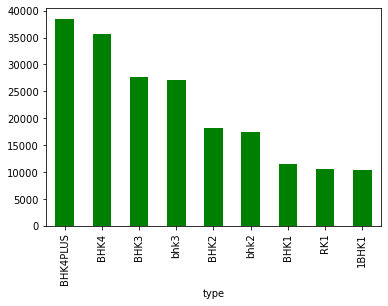

type
1BHK1       10375.000000
RK1         10565.000000
BHK1        11426.646812
bhk2        17500.000000
BHK2        18208.790123
bhk3        27125.000000
BHK3        27588.077630
BHK4        35709.051724
BHK4PLUS    38483.333333
Name: rent, dtype: float64 



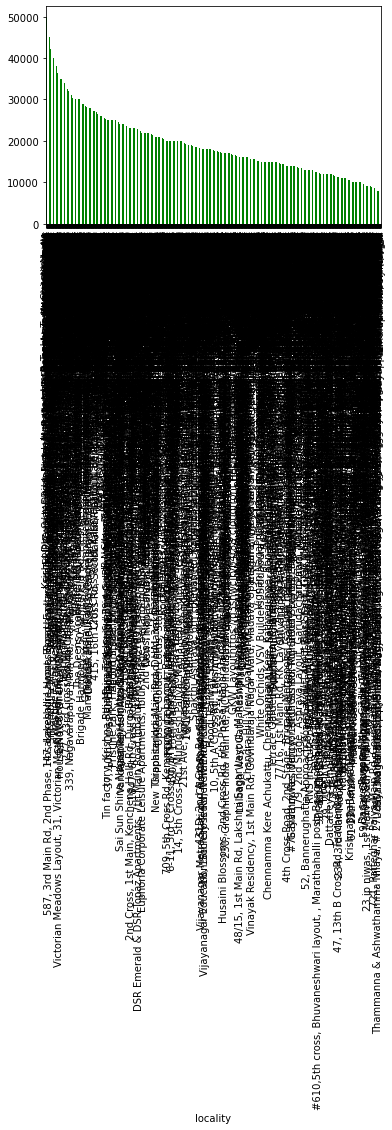

locality
Malleshpalya New Bus Station, BEML Main Road, LBS Nagar, Kaggadasapura, Bengaluru, Karnataka, India     8000.0
6th Phase JP Nagar                                                                                      8000.0
BTM LAYOUT STAGE 2                                                                                      8000.0
Hoysala Nagar, Indiranagar                                                                              8000.0
Garden Villas                                                                                           8000.0
                                                                                                        ...   
Chennammanakere Achukattu,                                                                             50000.0
Krishvi Dhavala, Doddakannelli, Bellandur, Bengaluru, Karnataka, India                                 50000.0
Devarabisanahalli, Bellandur                                                                           

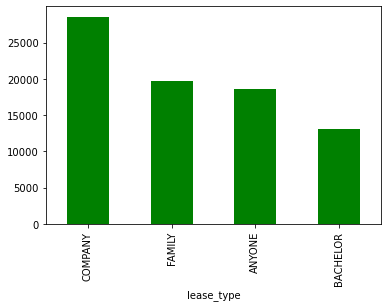

lease_type
BACHELOR    13085.669521
ANYONE      18600.971604
FAMILY      19766.545194
COMPANY     28546.551724
Name: rent, dtype: float64 



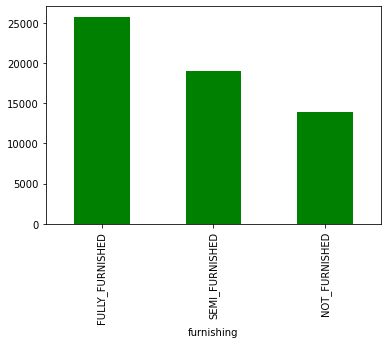

furnishing
NOT_FURNISHED      13910.635534
SEMI_FURNISHED     19021.927056
FULLY_FURNISHED    25744.444254
Name: rent, dtype: float64 



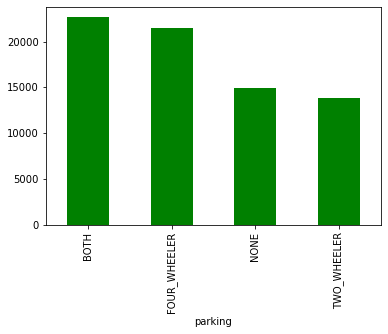

parking
TWO_WHEELER     13789.536476
NONE            14975.169082
FOUR_WHEELER    21515.050139
BOTH            22631.076421
Name: rent, dtype: float64 



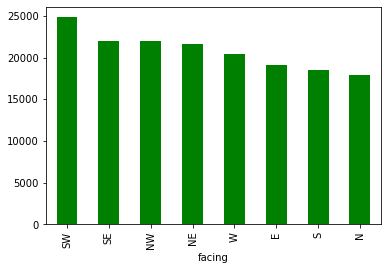

facing
N     17957.120877
S     18511.189100
E     19042.824034
W     20458.607745
NE    21664.501235
NW    21949.664430
SE    22021.979275
SW    24813.559322
Name: rent, dtype: float64 



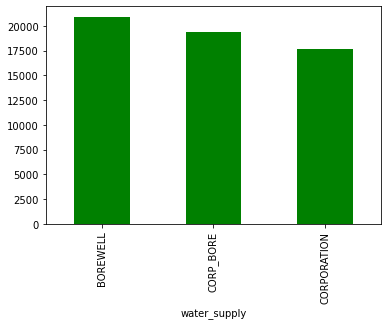

water_supply
CORPORATION    17617.973972
CORP_BORE      19411.963239
BOREWELL       20917.946784
Name: rent, dtype: float64 



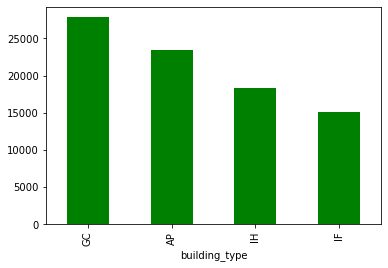

building_type
IF    15096.604656
IH    18303.567568
AP    23371.868679
GC    27852.941176
Name: rent, dtype: float64 



In [9]:
# For each categorical variable except 'activation_date' and 'amenities' columns:
for var in ['type', 'locality','lease_type',
            'furnishing', 'parking', 'facing', 'water_supply', 'building_type']:

    temp_df1 =df.groupby([var]).mean()
    temp_df1['rent'].sort_values(ascending=False).plot.bar(color='green')
    plt.show()

    b=temp_df1['rent'].sort_values()
    print(b,'\n')
    
# There definitely exists a relationship between these categorical variables and the target...

#### Converting the 'activation_date' column' datatype to datetime

In [10]:
df['activation_date']=df['activation_date'].astype(str)

#### Feature engineering for the 'amenities' column

In [11]:
import json

a=0
l=[]
c=[]
for j in list(df['amenities']):
    res = json.loads(j)
    s=len((list(res.keys())))
    l.append(s)
    if s>a:
        a=s
        c.append(list(res.keys()))
print(set(l))
print(a)
print(c[-1])

{18, 19, 12}
19
['LIFT', 'GYM', 'INTERNET', 'AC', 'CLUB', 'INTERCOM', 'POOL', 'CPA', 'FS', 'SERVANT', 'SECURITY', 'SC', 'GP', 'PARK', 'RWH', 'STP', 'HK', 'PB', 'VP']


*The data in 'amenities' column is in **json** format*

In [12]:
q=[]
w=[]

for j in list(df['amenities']):
    res = json.loads(j)
    d=list(res.keys())
#     e=list(res.values())
    g=[]
    for k in c[-1]:
        if k in d:
            f=res[k]
            if f==True:
                g.append(1)
            elif f==False:
                g.append(0)
        elif k not in d:
            g.append(-1)
        
        
    q.append(g)
    

# Creating a new 'amenities' dataframe

df1=pd.DataFrame(q,columns=c[-1])
df1['id']=list(df['id'])

- *Basically what I have done here is that I've changed each json data in the 'amenities' column to dictionary format and extracted the values from each dictionary and stored as '1' if it is 'True' and '0' if it is 'False' in the list named as 'q'*
- *Next I have created a new dataframe(df1) with the newly engineered 'amenities' column which I will concatenate with the original dataframe*


In [13]:
# Checking the shape of the dataframe containing only the 'amenities' columns details

df1.shape

(20357, 20)

In [14]:
# Original dataset shape

df.shape

(20357, 27)

In [15]:
# Creating a copy of the original dataset

original_df=df.copy()

In [16]:
df['amenities'].iloc[200]

'{"LIFT":false,"GYM":false,"INTERNET":true,"AC":false,"CLUB":false,"INTERCOM":false,"POOL":false,"CPA":false,"FS":false,"SERVANT":false,"SECURITY":false,"SC":true,"GP":false,"PARK":false,"RWH":false,"STP":true,"HK":true,"PB":false,"VP":false}'

In [17]:
df1.iloc[200]

LIFT                                       0
GYM                                        0
INTERNET                                   1
AC                                         0
CLUB                                       0
INTERCOM                                   0
POOL                                       0
CPA                                        0
FS                                         0
SERVANT                                    0
SECURITY                                   0
SC                                         1
GP                                         0
PARK                                       0
RWH                                        0
STP                                        1
HK                                         1
PB                                         0
VP                                         0
id          ff8081815c206e9a015c2468c07f3188
Name: 200, dtype: object

In [18]:
l=[i.split()[0] for i in list(original_df['locality'])]
df['locality']=l
# df['locality'].isnull().sum()
df['locality'].isnull().sum()

0

### Creating a new column in the dataframe named 'rent_level'

In [19]:
t=[]
for i in list(df['rent']):
    if i<=12500:
        t.append('low_rent')
    elif i>12500 and i<=17500:
        t.append('medium_rent')
    elif i>17500 and i<=24000:
        t.append('high_rent')
    else:
        t.append('costly_rent')
df['rent_level']=t
len(t)

20357

In [20]:
# Dropping the original 'amenities' column from the dataframe
df.drop(df.columns[20], axis=1, inplace=True)

#Conatenating the original and newly created 'amenities' dataframe
df2 = pd.merge(df, df1, on='id', how='outer')

df2.shape

(20357, 46)

In [21]:
df2.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10,12.929557,77.672280,ANYONE,0,1,0,...,0,1,1,0,1,1,1,0,1,1
1,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06,12.982870,80.262012,FAMILY,0,1,0,...,0,0,1,0,1,0,0,0,1,1
2,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,2018-07-20,12.955991,77.531634,FAMILY,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,2018-05-31,12.963903,77.649446,FAMILY,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,ff8081815f48e4aa015f4dd1a9c6696b,BHK1,"Seetharampalya,Hoodi",2017-10-24,12.986196,77.718314,FAMILY,1,1,1,...,0,1,0,0,0,0,0,0,1,0


In [22]:
original_df.iloc[12]['amenities']
   

'{"LIFT":true,"GYM":true,"INTERNET":true,"AC":false,"CLUB":true,"INTERCOM":true,"POOL":true,"CPA":true,"FS":true,"SERVANT":false,"SECURITY":true,"SC":true,"GP":false,"PARK":true,"RWH":false,"STP":false,"HK":false,"PB":true,"VP":false}'

In [23]:
df2.iloc[12][24:]

activation_year            2017
activation_month              9
rent_level          costly_rent
LIFT                          1
GYM                           1
INTERNET                      1
AC                            0
CLUB                          1
INTERCOM                      1
POOL                          1
CPA                           1
FS                            1
SERVANT                       0
SECURITY                      1
SC                            1
GP                            0
PARK                          1
RWH                           0
STP                           0
HK                            0
PB                            1
VP                            0
Name: 12, dtype: object

## EDA

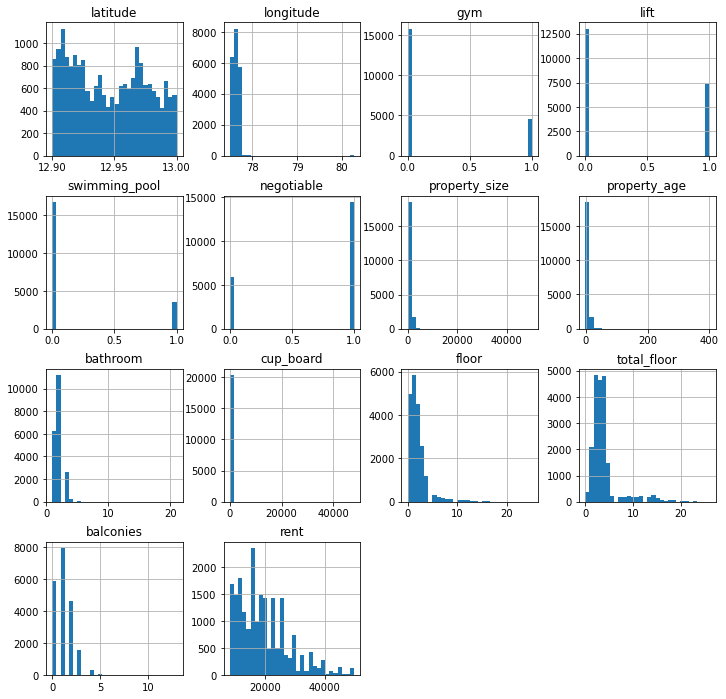

In [24]:
df2[nc].hist(bins=30,figsize=(12,12))
plt.show()

### Checking for correlation between features

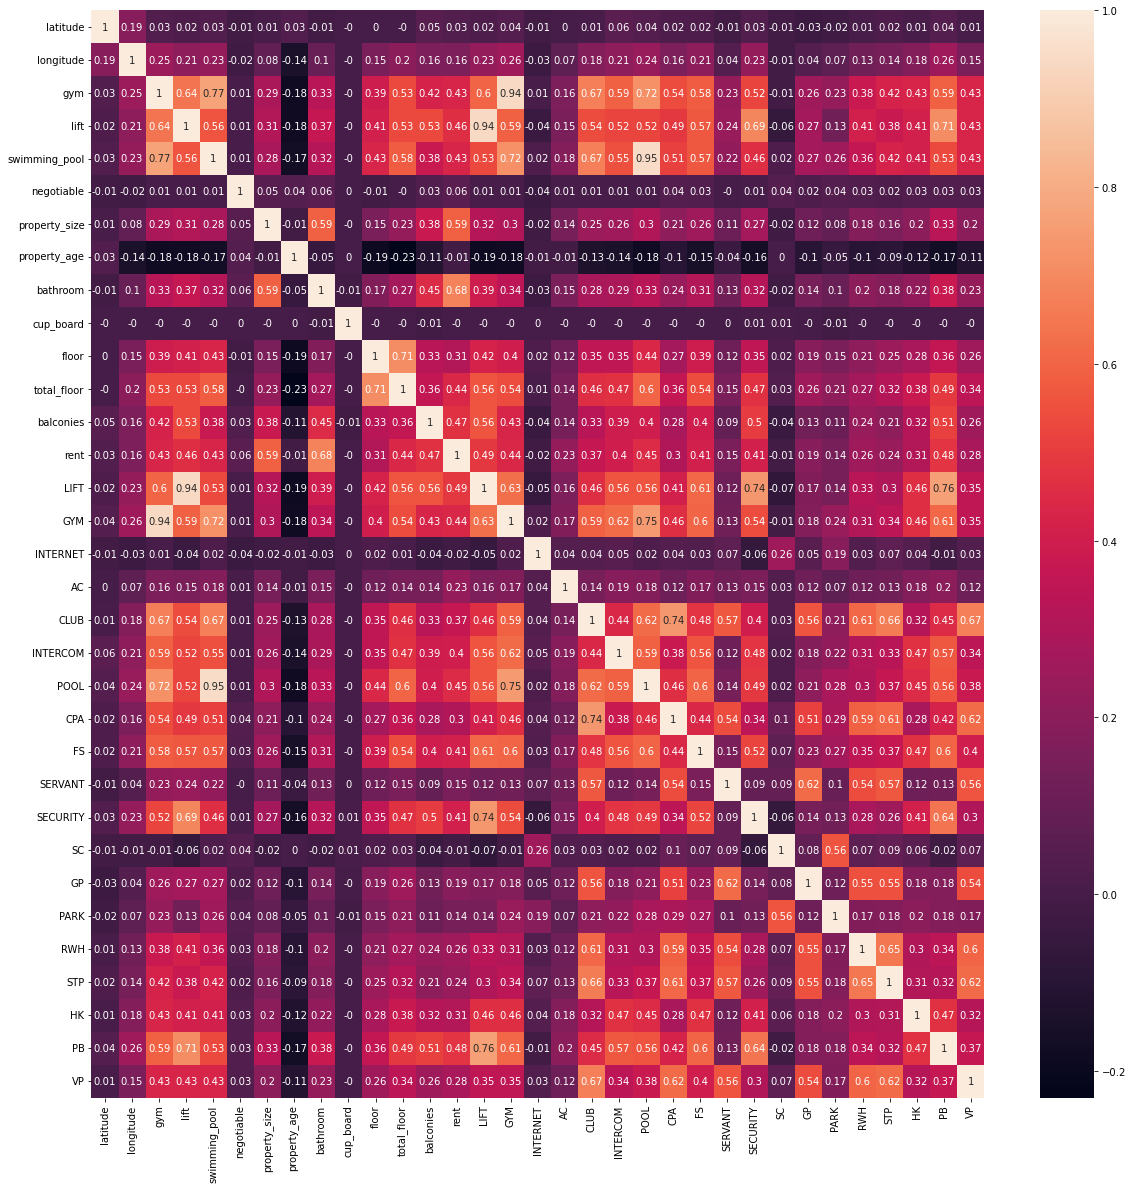

In [25]:
corr_mat = df2.corr().round(2)
plt.subplots(figsize=(20,20))
ax = sns.heatmap(data=corr_mat, annot=True)
plt.show()

- *A strong correlation exists between the gym,swimming_pool,lift,POOL,GYM,LIFT columns*
- *So I'll drop POOL,GYM,LIFT,latitude,longitude columns to decrease redundancy*

In [26]:
df2.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'water_supply',
       'building_type', 'balconies', 'rent', 'activation_year',
       'activation_month', 'rent_level', 'LIFT', 'GYM', 'INTERNET', 'AC',
       'CLUB', 'INTERCOM', 'POOL', 'CPA', 'FS', 'SERVANT', 'SECURITY', 'SC',
       'GP', 'PARK', 'RWH', 'STP', 'HK', 'PB', 'VP'],
      dtype='object')

In [27]:
df2=df2[['id', 'type', 'locality','activation_date','activation_year','activation_month', 
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'water_supply',
       'building_type', 'balconies', 'rent', 'INTERNET', 'AC',
       'CLUB', 'INTERCOM',  'CPA', 'FS', 'SERVANT', 'SECURITY', 'SC',
       'GP', 'PARK', 'RWH', 'STP', 'HK', 'PB', 'VP','rent_level']]

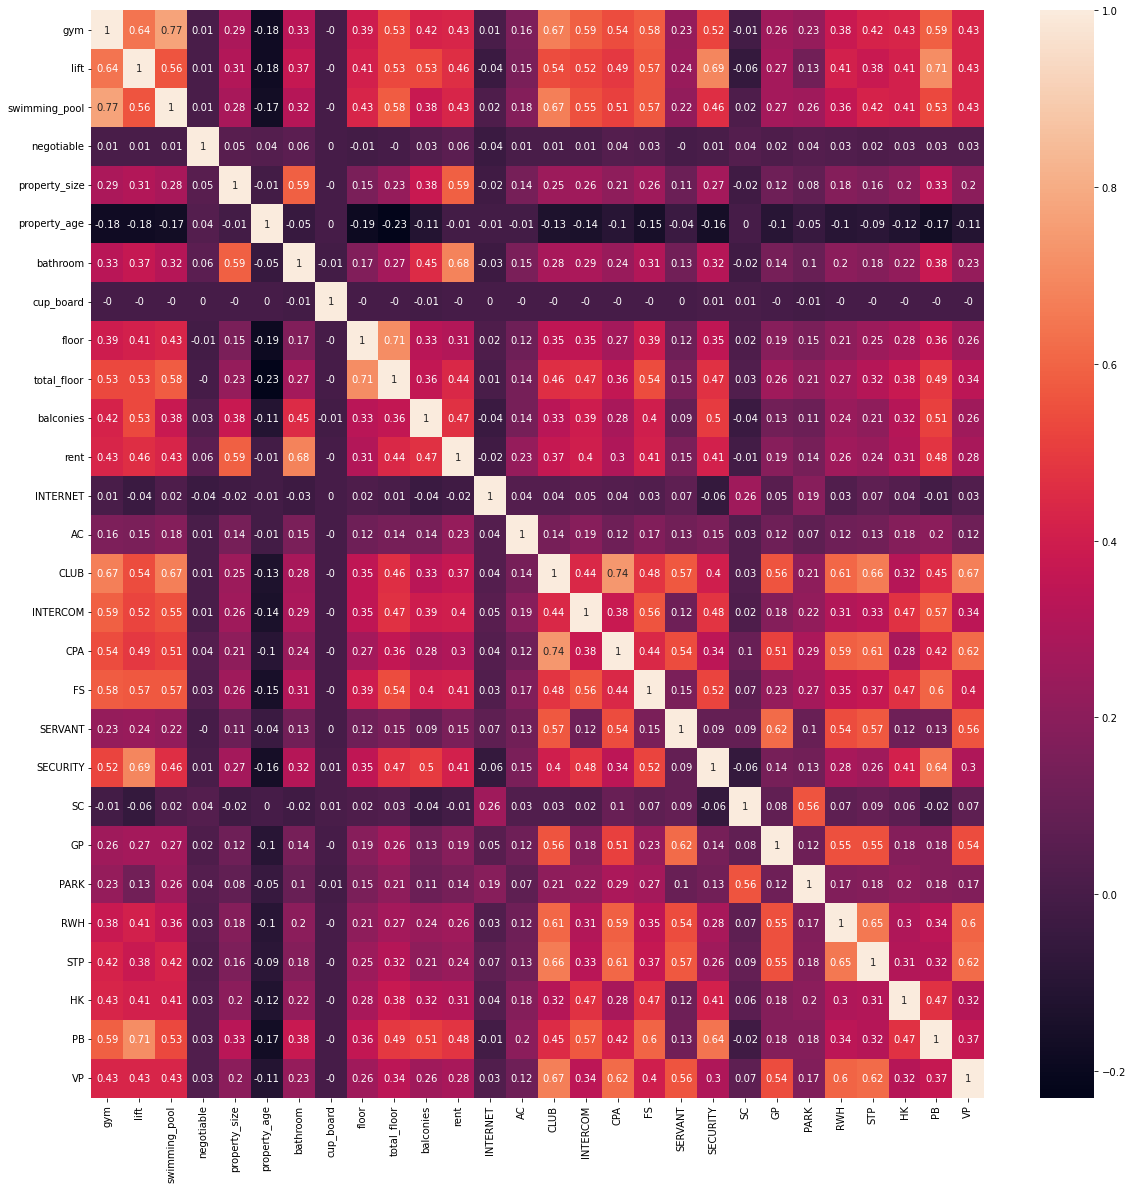

In [28]:
corr_mat = df2.corr().round(2)
plt.subplots(figsize=(20,20))
ax = sns.heatmap(data=corr_mat, annot=True)
plt.show()

### Checking cardinality for each columns

In [29]:
df2.columns

Index(['id', 'type', 'locality', 'activation_date', 'activation_year',
       'activation_month', 'lease_type', 'gym', 'lift', 'swimming_pool',
       'negotiable', 'furnishing', 'parking', 'property_size', 'property_age',
       'bathroom', 'facing', 'cup_board', 'floor', 'total_floor',
       'water_supply', 'building_type', 'balconies', 'rent', 'INTERNET', 'AC',
       'CLUB', 'INTERCOM', 'CPA', 'FS', 'SERVANT', 'SECURITY', 'SC', 'GP',
       'PARK', 'RWH', 'STP', 'HK', 'PB', 'VP', 'rent_level'],
      dtype='object')

In [30]:
for i in ['type',  'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom','facing', 'cup_board', 'floor',
       'total_floor', 'water_supply','building_type', 'balconies','rent_level']:
   
    print(f'Total number of unique labels in {i}:',df2[i].nunique(),'\n',df2[i].value_counts())

Total number of unique labels in type: 9 
 BHK2        11583
BHK3         4354
BHK1         3576
RK1           550
BHK4          232
BHK4PLUS       30
bhk2           16
bhk3           12
1BHK1           4
Name: type, dtype: int64
Total number of unique labels in lease_type: 4 
 FAMILY      10101
ANYONE       9614
BACHELOR      584
COMPANY        58
Name: lease_type, dtype: int64
Total number of unique labels in gym: 2 
 0    15749
1     4608
Name: gym, dtype: int64
Total number of unique labels in lift: 2 
 0    13008
1     7349
Name: lift, dtype: int64
Total number of unique labels in swimming_pool: 2 
 0    16802
1     3555
Name: swimming_pool, dtype: int64
Total number of unique labels in negotiable: 2 
 1    14482
0     5875
Name: negotiable, dtype: int64
Total number of unique labels in furnishing: 3 
 SEMI_FURNISHED     17767
NOT_FURNISHED       1424
FULLY_FURNISHED     1166
Name: furnishing, dtype: int64
Total number of unique labels in parking: 4 
 BOTH            10717
TWO_WHE

### Checking for outliers and replacing them with upper and lower limit values respectively

In [31]:
def plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

   # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    plt.show()

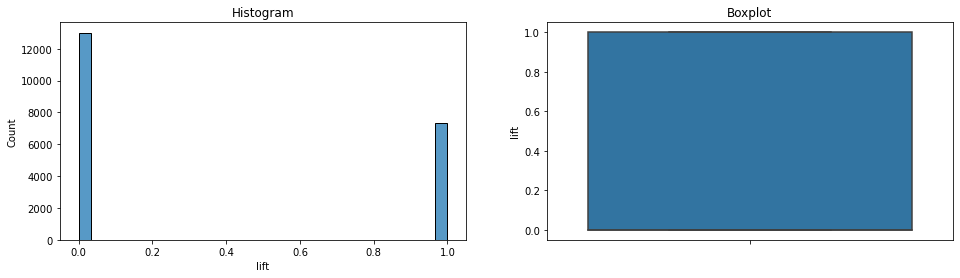

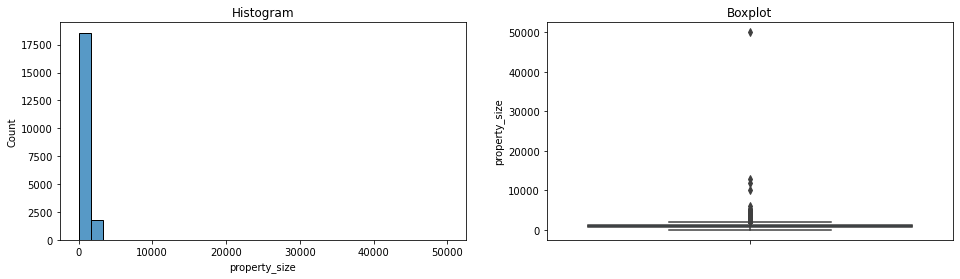

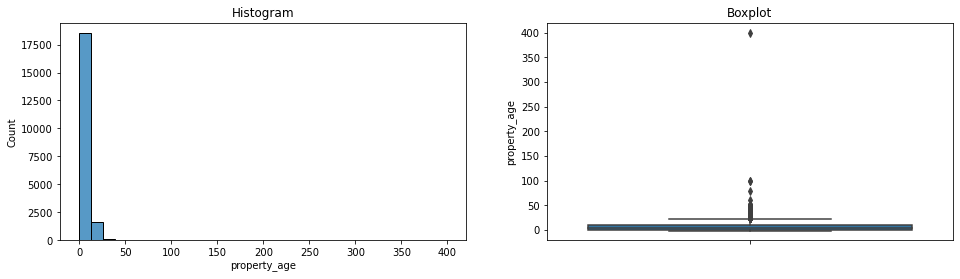

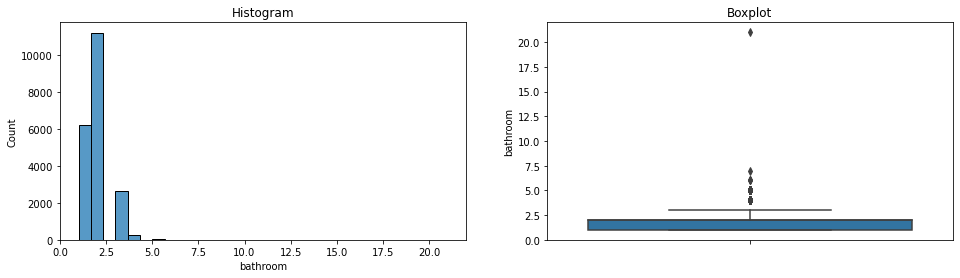

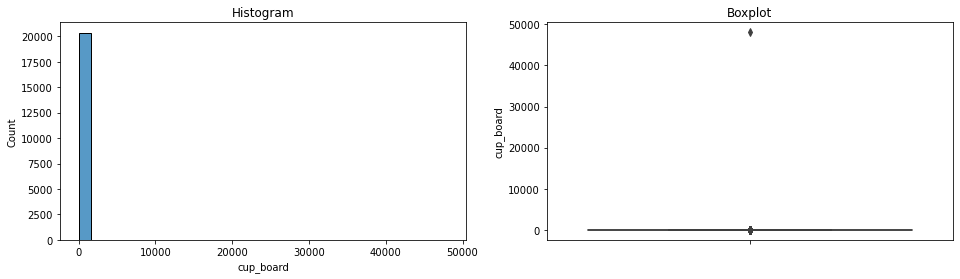

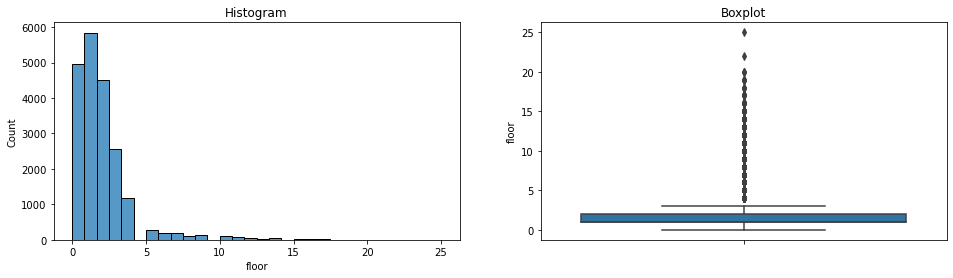

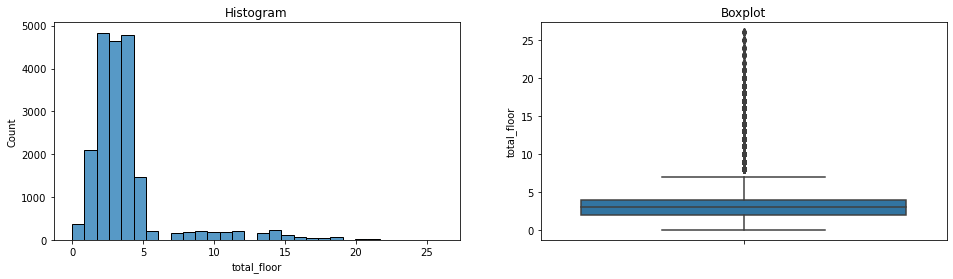

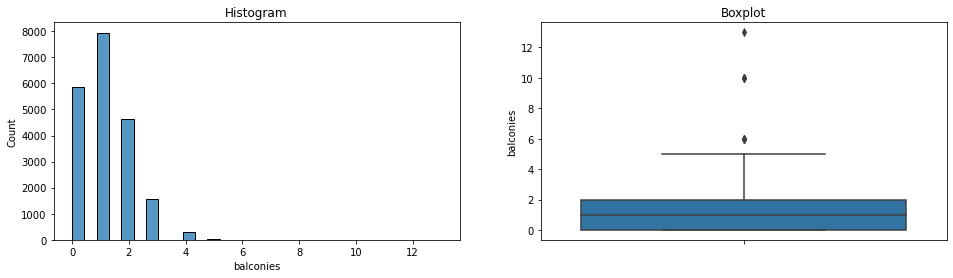

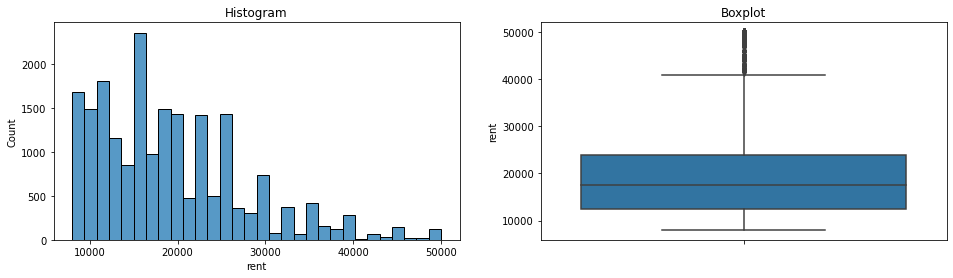

In [32]:
for m in ['lift','property_size', 
          'property_age', 'bathroom', 'cup_board', 'floor', 'total_floor', 'balconies', 'rent']:
    plots(df2, m)

In [33]:
def find_skewed_boundaries(df, variable, distance):

    # Calculating the boundaries outside which sit the outliers
    # for skewed distributions


    IQR = round(df[variable].quantile(0.75) - df[variable].quantile(0.25))

    lower_boundary = abs(round(df[variable].quantile(0.25) - (IQR * distance)))
    upper_boundary = abs(round(df[variable].quantile(0.75) + (IQR * distance)))

    return upper_boundary, lower_boundary

In [34]:
ul=[]
for v in ['lift','property_size', 
          'property_age', 'bathroom', 'cup_board', 'floor', 'total_floor', 'balconies', 'rent']:
    upper_limit, lower_limit = find_skewed_boundaries(df2, v, 1.5)
    ul.append((v,upper_limit, lower_limit))

In [35]:
ul

[('lift', 2, 2),
 ('property_size', 2150, 170),
 ('property_age', 24, 12),
 ('bathroom', 4, 0),
 ('cup_board', 6, 2),
 ('floor', 4, 0),
 ('total_floor', 7, 1),
 ('balconies', 5, 3),
 ('rent', 41250, 4750)]

In [36]:
def replace_outlier(dataset,variable,upper_limit,lower_limit):
    dataset[variable]= np.where(dataset[variable] > upper_limit, upper_limit,
                       np.where(dataset[variable] < lower_limit, lower_limit, dataset[variable]))

In [37]:
for v1 in range(len(ul)):
    replace_outlier(df2,ul[v1][0],ul[v1][1],ul[v1][2])

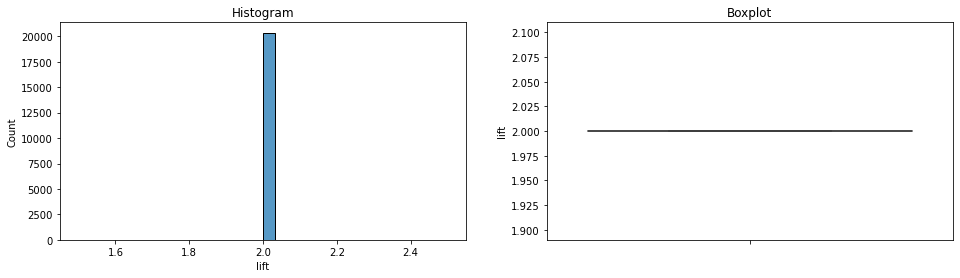

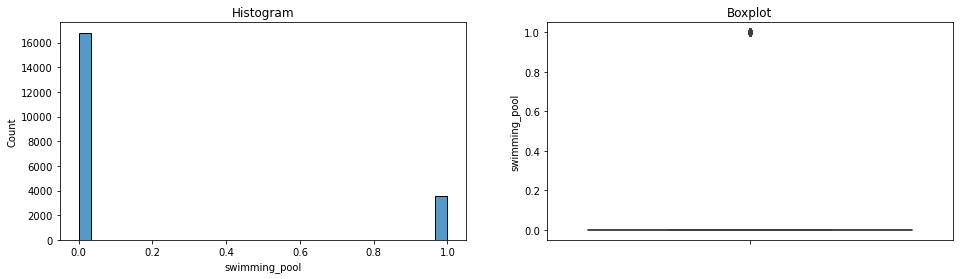

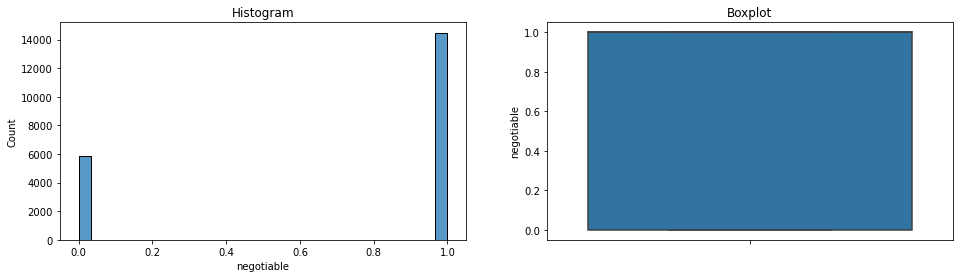

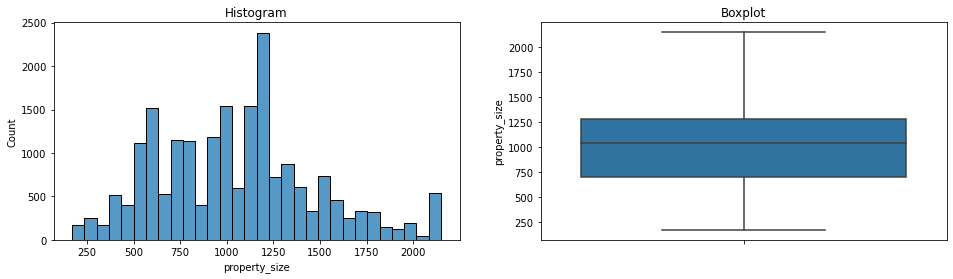

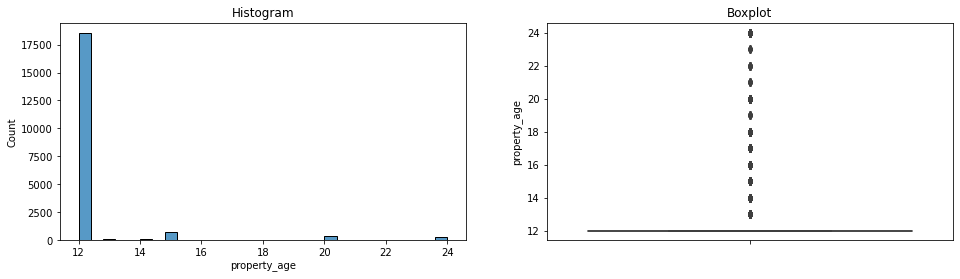

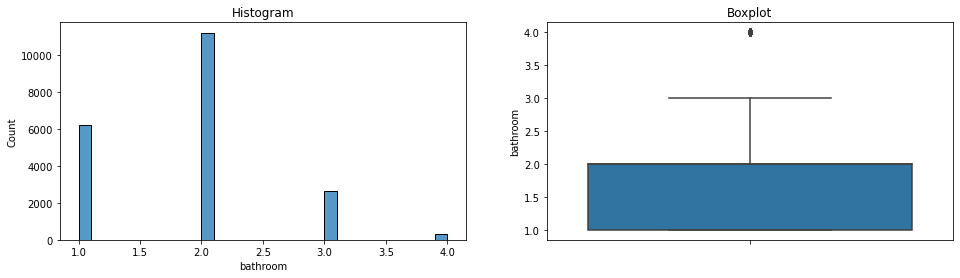

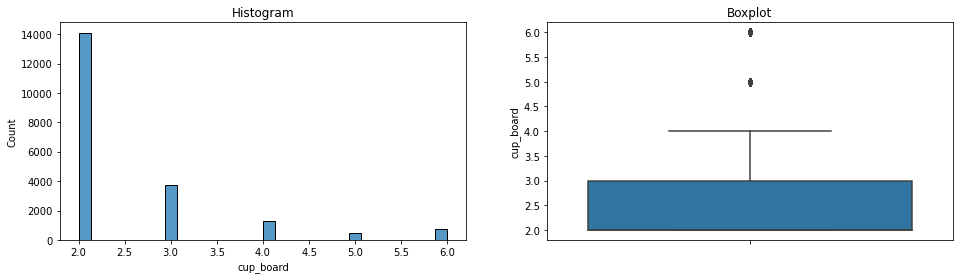

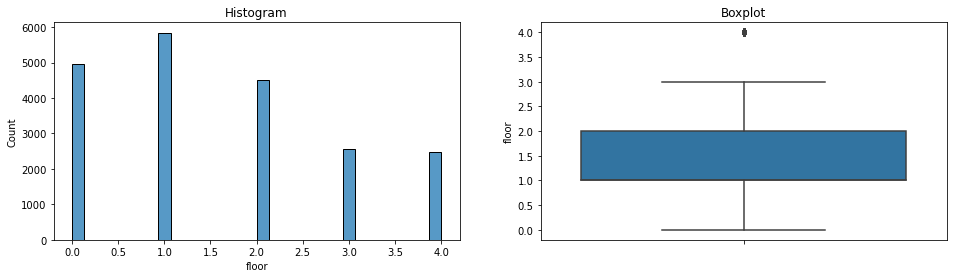

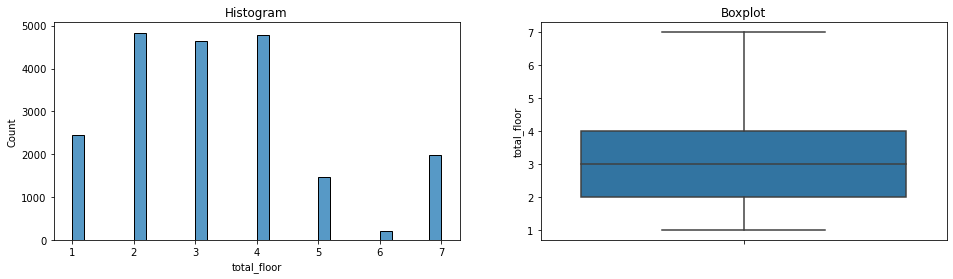

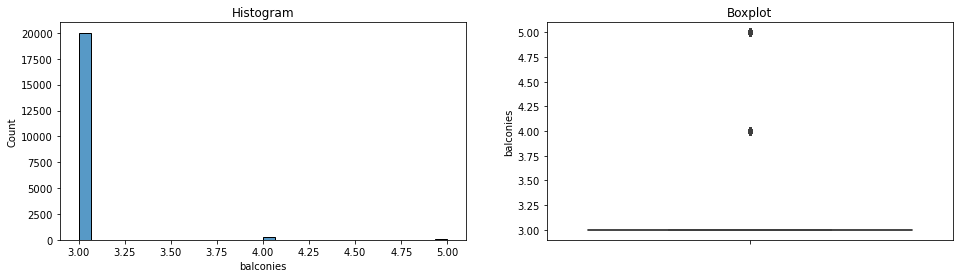

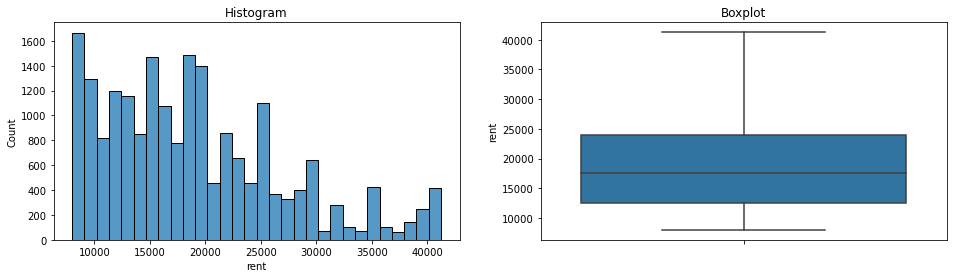

In [38]:
for m in nc[3:]:
    plots(df2, m)

### Transforming the distribution of the 'property_size' and 'rent' columns into 'normal distribution'

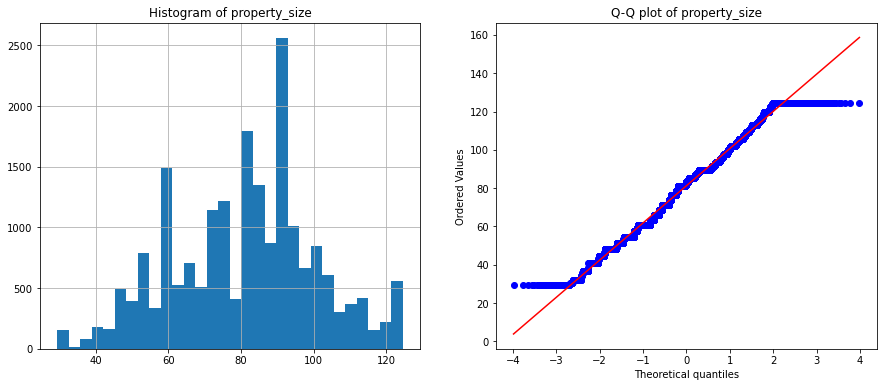

In [39]:
# for Q-Q plots
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer

def diagnostic_plots(df, variable):

    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable

    plt.figure(figsize=(15, 6))

    # histogram
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f"Histogram of {variable}")

    # q-q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")

    plt.show()

# with open-source packages
from sklearn.preprocessing import PowerTransformer

# initialize the transformer with box-cox
transformer1 = PowerTransformer(method="box-cox", standardize=False)
transformer1.fit(df2[['rent']])
# transformer1.set_output(transform="pandas")
df2['rent']= transformer1.transform(df2[['rent']])

# diagnostic_plots(df2, 'rent')

transformer2 = PowerTransformer(method="yeo-johnson", standardize=False)
transformer2.fit(df2[['property_size']])
# transformer2.set_output(transform="pandas")
df2['property_size']= transformer2.transform(df2[['property_size']])

diagnostic_plots(df2, 'property_size')



## Building the ML model

In [40]:
from sklearn.model_selection import train_test_split

# for encoding with feature-engine
from feature_engine.encoding import MeanEncoder

In [41]:
df2=df2[['type', 'locality','activation_date', 'activation_year','activation_month', 
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'water_supply',
       'building_type', 'balconies',  'INTERNET', 'AC', 'CLUB',
       'INTERCOM', 'CPA', 'FS', 'SERVANT', 'SECURITY', 'SC', 'GP', 'PARK',
       'RWH', 'STP', 'HK', 'PB', 'VP','rent','rent_level']]

In [42]:
# let's separate into training and testing set
X=df2[['type', 'locality','activation_date', 'activation_year','activation_month', 
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'water_supply',
       'building_type', 'balconies',  'INTERNET', 'AC', 'CLUB',
       'INTERCOM', 'CPA', 'FS', 'SERVANT', 'SECURITY', 'SC', 'GP', 'PARK',
       'RWH', 'STP', 'HK', 'PB', 'VP','rent_level']]
y=df2['rent']

X_train, X_test, y_train, y_test = train_test_split(
    X,  # predictors
    y,  # target
    test_size=0.25,  # percentage of obs in test set
    random_state=0,
)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((15267, 39), (5090, 39))

### Mean encoding the categorical variables

In [43]:
mean_enc = MeanEncoder(
    # NOTE that we indicate ordered in the encoding_method, otherwise it assings numbers arbitrarily
#     encoding_method="ordered",
    variables=['type', 'locality','activation_date','activation_year','activation_month', 'lease_type','furnishing', 'parking',
               'facing','water_supply','building_type','rent_level']
)

In [44]:
mean_enc.fit(X_train, y_train)

MeanEncoder(variables=['type', 'locality', 'activation_date', 'activation_year',
                       'activation_month', 'lease_type', 'furnishing',
                       'parking', 'facing', 'water_supply', 'building_type',
                       'rent_level'])

In [45]:
X_train = mean_enc.transform(X_train)
X_test = mean_enc.transform(X_test)

# let's explore the result
X_train.head()

C:\Users\DELL\anaconda3\lib\site-packages\feature_engine\encoding\base_encoder.py:257: UserWarning: During the encoding, NaN values were introduced in the feature(s) locality.
  warnings.warn(


,type,locality,activation_date,activation_year,activation_month,lease_type,gym,lift,swimming_pool,negotiable,...,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP,rent_level
11758,6.840822,7.035662,7.044135,7.06988,7.065103,7.054283,0,2,0,1,...,0,0,0,1,0,0,0,0,0,7.000257
15943,7.275073,7.277445,7.060112,7.06988,7.075838,7.054283,1,2,1,1,...,1,0,0,1,1,1,1,1,1,7.350773
5560,7.068957,7.033827,7.110446,7.06988,7.071988,7.054283,0,2,0,1,...,1,0,0,1,1,0,1,0,1,7.000257
19958,7.068957,6.973272,7.057129,7.06988,7.071988,7.054283,0,2,0,0,...,1,0,0,0,0,0,0,0,0,6.793286
11982,7.068957,7.327532,7.073183,7.06837,7.075838,7.092657,1,2,1,0,...,1,1,0,1,1,1,1,1,1,7.350773


In [46]:
X_test.isnull().sum()

type                  0
locality            131
activation_date       0
activation_year       0
activation_month      0
lease_type            0
gym                   0
lift                  0
swimming_pool         0
negotiable            0
furnishing            0
parking               0
property_size         0
property_age          0
bathroom              0
facing                0
cup_board             0
floor                 0
total_floor           0
water_supply          0
building_type         0
balconies             0
INTERNET              0
AC                    0
CLUB                  0
INTERCOM              0
CPA                   0
FS                    0
SERVANT               0
SECURITY              0
SC                    0
GP                    0
PARK                  0
RWH                   0
STP                   0
HK                    0
PB                    0
VP                    0
rent_level            0
dtype: int64

In [47]:
X_test.head()

,type,locality,activation_date,activation_year,activation_month,lease_type,gym,lift,swimming_pool,negotiable,...,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP,rent_level
12142,7.068957,7.143091,7.117170,7.06988,7.071988,7.092657,0,2,0,1,...,0,1,0,0,0,0,0,0,0,7.000257
12712,7.068957,7.075338,7.042059,7.06837,7.065523,7.054283,0,2,0,1,...,1,0,0,0,1,1,1,1,1,7.156773
15022,7.068957,7.117209,7.096836,7.06988,7.080197,7.054283,0,2,0,1,...,0,1,0,1,0,0,1,0,0,7.156773
14037,7.068957,7.035662,7.057889,7.06837,7.061968,7.054283,1,2,1,1,...,1,0,0,1,1,1,0,1,1,7.156773
5315,6.840822,7.023648,7.018372,7.06837,7.065103,7.054283,0,2,0,1,...,0,1,0,1,0,0,0,0,0,6.793286


In [48]:
# Im creating a new column in the X_test called 'rent' which contains all values from y_test
X_test['rent']=y_test
X_test.dropna(inplace=True)

y_test=X_test['rent']
X_test=X_test[['type', 'locality','activation_date','activation_year','activation_month', 
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'water_supply',
       'building_type', 'balconies',  'INTERNET', 'AC', 'CLUB',
       'INTERCOM', 'CPA', 'FS', 'SERVANT', 'SECURITY', 'SC', 'GP', 'PARK',
       'RWH', 'STP', 'HK', 'PB', 'VP','rent_level']]


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.metrics import r2_score,mean_squared_error

from yellowbrick.regressor import PredictionError, ResidualsPlot

In [50]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

### Linear regression

In [51]:
# Let's train a linear model.

# Instantiate a linear model.
linreg = LinearRegression()

# Train the model.
linreg.fit(scaler.transform(X_train), y_train)

# Make predictions on the train set and calculate
# the mean squared error.
# print('Train set')
pred_train = linreg.predict(scaler.transform(X_train))
print('Linear Regression rmse: {}'.format(np.sqrt(mean_squared_error(y_train, pred_train))))
print('Linear Regression r2-score: {}'.format(r2_score(y_train, pred_train)))
# Make predictions on the test set and calculate
# the mean squared error.
print('Test set')
pred_test = linreg.predict(scaler.transform(X_test))
print('Linear Regression rmse: {}'.format(np.sqrt(mean_squared_error(y_test, pred_test))))
print('Linear Regression r2-score: {}'.format(r2_score(y_test, pred_test)))
print()

Linear Regression rmse: 0.05698844044362647
Linear Regression r2-score: 0.9286230928899446
Test set
Linear Regression rmse: 0.05855787383231524
Linear Regression r2-score: 0.923301496289854



In [52]:
u1=pd.concat([y_train,y_test],axis=0)
u2=pd.concat([pd.Series(pred_train),pd.Series(pred_test)],axis=0)


In [53]:
pred=transformer1.inverse_transform(pd.DataFrame(u2,columns=['re']))
y= transformer1.inverse_transform(u1.values.reshape(-1, 1))
x=pd.DataFrame({'rv':list(y),'pv':list(pred)})
x['residuals']=x['rv']-x['pv']
x.head()

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- re
Feature names seen at fit time, yet now missing:
- rent

  warnings.warn(message, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


,rv,pv,residuals
0,[12999.999999999984],[14392.80081458109],[-1392.8008145811073]
1,[35999.99999999999],[32828.68480430019],[3171.3151956998045]
2,[15999.999999999989],[15534.563609929692],[465.4363900702974]
3,[10000.000000000022],[10277.722654023666],[-277.7226540236443]
4,[29999.999999999975],[29652.29620214208],[347.70379785789555]


In [54]:
x['residuals'].max(),x['residuals'].min()

(array([16232.93120387]), array([-10990.49162026]))

In [63]:
import shap
shap.initjs()

explainer = shap.KernelExplainer(linreg.predict, X_test[:103])

shap_values = explainer.shap_values(X_test, nsamples=100)




Using 103 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/4959 [00:00<?, ?it/s]

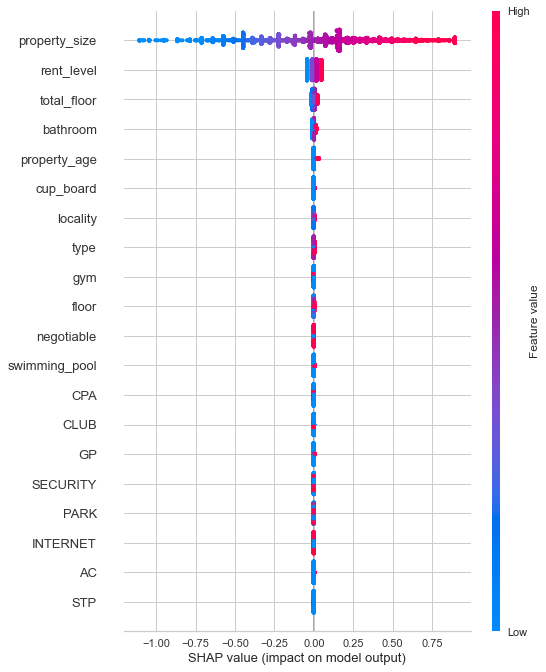

In [64]:
shap.summary_plot(shap_values, X_test)





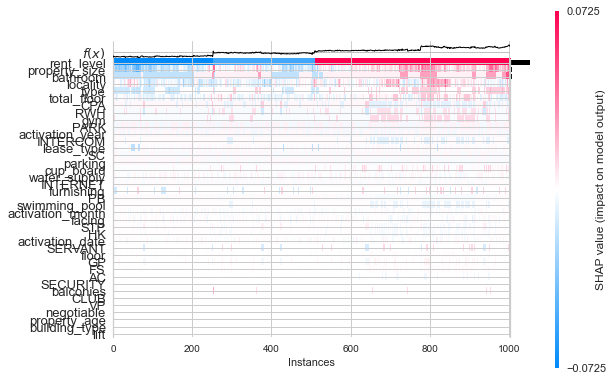

In [65]:
model = LinearRegression().fit(X_test[:1003],y_test[:1003])
explainer = shap.Explainer(model, X_test[:1003])
shap_values = explainer(X_test[:1003])
shap.plots.heatmap(shap_values,max_display=39)

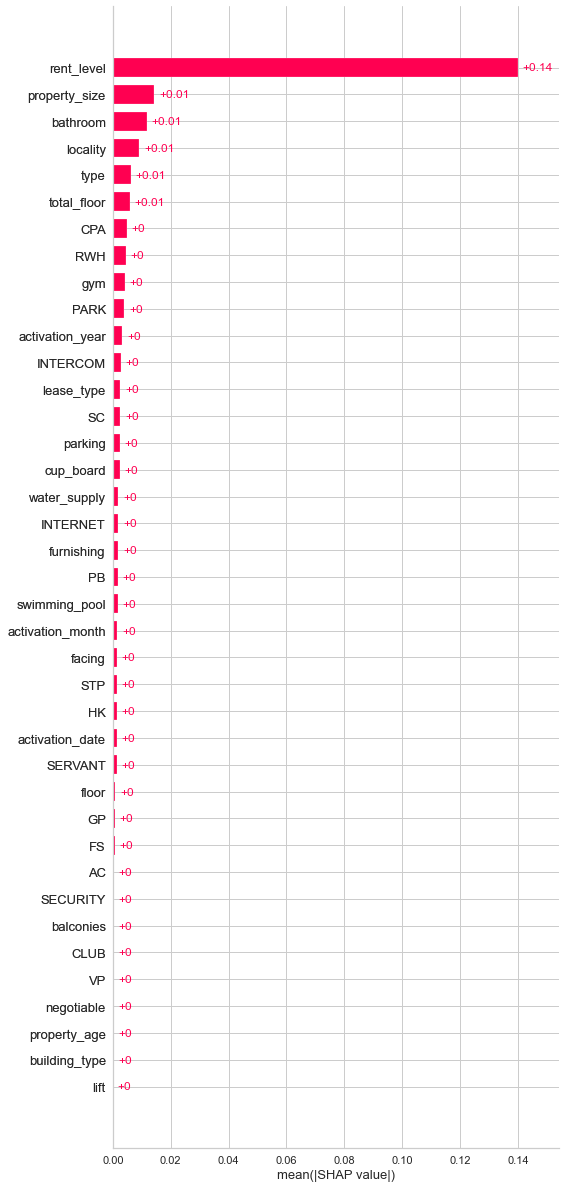

In [66]:
shap.plots.bar(shap_values, max_display=39)

In [68]:
# Let's train a linear model.

# Instantiate a linear model.
linreg = LinearRegression()


# Train the model.
linreg.fit(scaler.fit_transform(X_train[['type', 'locality', 
        'gym', 'swimming_pool', 'negotiable',
        'parking', 'property_size', 'property_age', 'bathroom',
        'cup_board', 'floor', 'total_floor',  'INTERNET', 'AC', 'CLUB',
        'CPA', 'SECURITY', 'GP', 'PARK',
       'RWH', 'STP','rent_level']]), y_train)

# Make predictions on the train set and calculate
# the mean squared error.
# print('Train set')
pred_train = linreg.predict(scaler.transform(X_train[['type', 'locality', 
        'gym', 'swimming_pool', 'negotiable',
        'parking', 'property_size', 'property_age', 'bathroom',
        'cup_board', 'floor', 'total_floor',  'INTERNET', 'AC', 'CLUB',
        'CPA', 'SECURITY', 'GP', 'PARK',
       'RWH', 'STP','rent_level']]))
print('Linear Regression rmse: {}'.format(np.sqrt(mean_squared_error(y_train, pred_train))))
print('Linear Regression r2-score: {}'.format(r2_score(y_train, pred_train)))
# Make predictions on the test set and calculate
# the mean squared error.
print('Test set')
pred_test = linreg.predict(scaler.transform(X_test[['type', 'locality', 
        'gym', 'swimming_pool', 'negotiable',
        'parking', 'property_size', 'property_age', 'bathroom',
        'cup_board', 'floor', 'total_floor',  'INTERNET', 'AC', 'CLUB',
        'CPA', 'SECURITY', 'GP', 'PARK',
       'RWH', 'STP','rent_level']]))
print('Linear Regression rmse: {}'.format(np.sqrt(mean_squared_error(y_test, pred_test))))
print('Linear Regression r2-score: {}'.format(r2_score(y_test, pred_test)))
print()

Linear Regression rmse: 0.05740785767862984
Linear Regression r2-score: 0.9275686029892465
Test set
Linear Regression rmse: 0.05890633278156017
Linear Regression r2-score: 0.9223859644244672



### Random forest Regressor

In [69]:
r=RandomForestRegressor(n_estimators=105,criterion='squared_error', max_depth=25,min_samples_split=3,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.00001)

# Train the model.
r.fit(scaler.fit_transform(X_train[['type', 'locality', 
        'gym', 'swimming_pool', 'negotiable',
        'parking', 'property_size', 'property_age', 'bathroom',
        'cup_board', 'floor', 'total_floor',  'INTERNET', 'AC', 'CLUB',
        'CPA', 'SECURITY', 'GP', 'PARK',
       'RWH', 'STP','rent_level']]), y_train)

# Make predictions on the train set and calculate
# the mean squared error.
# print('Train set')
pred_train = r.predict(scaler.transform(X_train[['type', 'locality', 
        'gym', 'swimming_pool', 'negotiable',
        'parking', 'property_size', 'property_age', 'bathroom',
        'cup_board', 'floor', 'total_floor',  'INTERNET', 'AC', 'CLUB',
        'CPA', 'SECURITY', 'GP', 'PARK',
       'RWH', 'STP','rent_level']]))
print('r Regression rmse: {}'.format(np.sqrt(mean_squared_error(y_train, pred_train))))
print('r Regression r2-score: {}'.format(r2_score(y_train, pred_train)))
# Make predictions on the test set and calculate
# the mean squared error.
print('Test set')
pred_test = r.predict(scaler.transform(X_test[['type', 'locality', 
        'gym', 'swimming_pool', 'negotiable',
        'parking', 'property_size', 'property_age', 'bathroom',
        'cup_board', 'floor', 'total_floor',  'INTERNET', 'AC', 'CLUB',
        'CPA', 'SECURITY', 'GP', 'PARK',
       'RWH', 'STP','rent_level']]))
print('r Regression rmse: {}'.format(np.sqrt(mean_squared_error(y_test, pred_test))))
print('r Regression r2-score: {}'.format(r2_score(y_test, pred_test)))
print()

r Regression rmse: 0.02271812497009583
r Regression r2-score: 0.9886569682055106
Test set
r Regression rmse: 0.05716566116536132
r Regression r2-score: 0.9269051542607007



In [70]:
u1=pd.concat([y_train,y_test],axis=0)
u2=pd.concat([pd.Series(pred_train),pd.Series(pred_test)],axis=0)

pred=transformer1.inverse_transform(pd.DataFrame(u2,columns=['re']))
y= transformer1.inverse_transform(u1.values.reshape(-1, 1))
x=pd.DataFrame({'rv':list(y),'pv':list(pred)})
x['residuals']=x['rv']-x['pv']
x.head()

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- re
Feature names seen at fit time, yet now missing:
- rent

X does not have valid feature names, but PowerTransformer was fitted with feature names


,rv,pv,residuals
0,[12999.999999999984],[13435.213298851228],[-435.21329885124396]
1,[35999.99999999999],[35979.913306448245],[20.086693551747885]
2,[15999.999999999989],[15870.815037425366],[129.18496257462357]
3,[10000.000000000022],[10116.681098622483],[-116.68109862246092]
4,[29999.999999999975],[30349.2748132852],[-349.2748132852248]


In [71]:
x['residuals'].max(),x['residuals'].min()

(array([15108.33848104]), array([-13103.99389029]))

### HistGradientBoostingRegressor

In [72]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [73]:
hr=HistGradientBoostingRegressor(learning_rate=0.05,max_leaf_nodes=300,max_depth=200,
                                               max_iter=1000,
                                               random_state=2023)
# Train the model.
hr.fit(scaler.fit_transform(X_train[['type', 'locality', 
        'gym', 'swimming_pool', 'negotiable',
        'parking', 'property_size', 'property_age', 'bathroom',
        'cup_board', 'floor', 'total_floor',  'INTERNET', 'AC', 'CLUB',
        'CPA', 'SECURITY', 'GP', 'PARK',
       'RWH', 'STP','rent_level']]), y_train)

# Make predictions on the train set and calculate
# the mean squared error.
# print('Train set')
pred_train = hr.predict(scaler.transform(X_train[['type', 'locality', 
        'gym', 'swimming_pool', 'negotiable',
        'parking', 'property_size', 'property_age', 'bathroom',
        'cup_board', 'floor', 'total_floor',  'INTERNET', 'AC', 'CLUB',
        'CPA', 'SECURITY', 'GP', 'PARK',
       'RWH', 'STP','rent_level']]))
print('HistGradientBoostingRegressor rmse: {}'.format(np.sqrt(mean_squared_error(y_train, pred_train))))
print('HistGradientBoostingRegressor r2-score: {}'.format(r2_score(y_train, pred_train)))
# Make predictions on the test set and calculate
# the mean squared error.
print('Test set')
pred_test = hr.predict(scaler.transform(X_test[['type', 'locality', 
        'gym', 'swimming_pool', 'negotiable',
        'parking', 'property_size', 'property_age', 'bathroom',
        'cup_board', 'floor', 'total_floor',  'INTERNET', 'AC', 'CLUB',
        'CPA', 'SECURITY', 'GP', 'PARK',
       'RWH', 'STP','rent_level']]))
print('HistGradientBoostingRegressor rmse: {}'.format(np.sqrt(mean_squared_error(y_test, pred_test))))
print('HistGradientBoostingRegressor r2-score: {}'.format(r2_score(y_test, pred_test)))
print()

HistGradientBoostingRegressor rmse: 0.041499041513257305
HistGradientBoostingRegressor r2-score: 0.9621504854966734
Test set
HistGradientBoostingRegressor rmse: 0.056452024970206335
HistGradientBoostingRegressor r2-score: 0.9287187442161913



In [74]:
u1=pd.concat([y_train,y_test],axis=0)
u2=pd.concat([pd.Series(pred_train),pd.Series(pred_test)],axis=0)

pred=transformer1.inverse_transform(pd.DataFrame(u2,columns=['re']))
y= transformer1.inverse_transform(u1.values.reshape(-1, 1))

x=pd.DataFrame({'rv':list(y),'pv':list(pred)})
x['residuals']=x['rv']-x['pv']
x.head()

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- re
Feature names seen at fit time, yet now missing:
- rent

X does not have valid feature names, but PowerTransformer was fitted with feature names


,rv,pv,residuals
0,[12999.999999999984],[14300.050772353301],[-1300.0507723533174]
1,[35999.99999999999],[37101.91137267254],[-1101.9113726725482]
2,[15999.999999999989],[15847.52296092169],[152.47703907829964]
3,[10000.000000000022],[10629.636969781917],[-629.6369697818955]
4,[29999.999999999975],[30989.891776069213],[-989.8917760692384]


In [75]:
x['residuals'].max(),x['residuals'].min()

(array([14528.44235275]), array([-12418.9199417]))

X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names


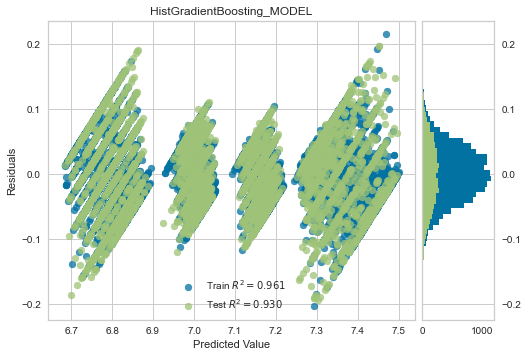

In [76]:
hist_regressor = HistGradientBoostingRegressor(learning_rate=0.05,max_leaf_nodes=200,max_depth=200,
                                               max_iter=1000,
                                               random_state=2023)
hist_regressor.fit(X_train[['type', 'locality', 
        'gym', 'swimming_pool', 'negotiable',
        'parking', 'property_size', 'property_age', 'bathroom',
        'cup_board', 'floor', 'total_floor',  'INTERNET', 'AC', 'CLUB',
        'CPA', 'SECURITY', 'GP', 'PARK',
       'RWH', 'STP','rent_level']], y_train)
# y_pred=bregressor.predict(X)
# mean_squared_error(y,y_pred)

visualizer = ResidualsPlot(hist_regressor)
visualizer.fit(X_train[['type', 'locality', 
        'gym', 'swimming_pool', 'negotiable',
        'parking', 'property_size', 'property_age', 'bathroom',
        'cup_board', 'floor', 'total_floor',  'INTERNET', 'AC', 'CLUB',
        'CPA', 'SECURITY', 'GP', 'PARK',
       'RWH', 'STP','rent_level']], y_train)
visualizer.score(X_test[['type', 'locality', 
        'gym', 'swimming_pool', 'negotiable',
        'parking', 'property_size', 'property_age', 'bathroom',
        'cup_board', 'floor', 'total_floor',  'INTERNET', 'AC', 'CLUB',
        'CPA', 'SECURITY', 'GP', 'PARK',
       'RWH', 'STP','rent_level']], y_test)
plt.title('HistGradientBoosting_MODEL')
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.legend()
plt.show()

### Running the model on the entire dataset 

In [77]:
df3=pd.concat([X_train[['type', 'locality', 
        'gym', 'swimming_pool', 'negotiable',
        'parking', 'property_size', 'property_age', 'bathroom',
        'cup_board', 'floor', 'total_floor',  'INTERNET', 'AC', 'CLUB',
        'CPA', 'SECURITY', 'GP', 'PARK',
       'RWH', 'STP','rent_level']], X_test[['type', 'locality', 
        'gym', 'swimming_pool', 'negotiable',
        'parking', 'property_size', 'property_age', 'bathroom',
        'cup_board', 'floor', 'total_floor',  'INTERNET', 'AC', 'CLUB',
        'CPA', 'SECURITY', 'GP', 'PARK',
       'RWH', 'STP','rent_level']]])
df4=list(pd.concat([y_train, y_test]))
df3['rent']=df4

In [78]:
X=df3.iloc[:,:-1].values
y=df3.iloc[:,-1].values


In [79]:
hr=HistGradientBoostingRegressor(learning_rate=0.05,max_leaf_nodes=300,max_depth=200,
                                               max_iter=1000,
                                               random_state=2023)
# Train the model.
X=scaler.fit_transform(X)
hr.fit(X, y)

# Make predictions on the train set and calculate
# the mean squared error.

pred = hr.predict(X)
print('HistGradientBoostingRegressor rmse: {}'.format(np.sqrt(mean_squared_error(y, pred))))
print('HistGradientBoostingRegressor r2-score: {}'.format(r2_score(y, pred)))


HistGradientBoostingRegressor rmse: 0.042949552690961186
HistGradientBoostingRegressor r2-score: 0.9592858482083022


In [80]:
# u1=pd.concat([y_train,y_test],axis=0)
# u2=pd.concat([pd.Series(pred_train),pd.Series(pred_test)],axis=0)

pred_o=transformer1.inverse_transform(pred.reshape(-1, 1))
y_o= transformer1.inverse_transform(y.reshape(-1, 1))

x=pd.DataFrame({'rv':list(y_o),'pv':list(pred_o)})
x['residuals']=x['rv']-x['pv']
x.head()

X does not have valid feature names, but PowerTransformer was fitted with feature names
X does not have valid feature names, but PowerTransformer was fitted with feature names


,rv,pv,residuals
0,[12999.999999999984],[14092.164260728778],[-1092.164260728794]
1,[35999.99999999999],[33112.28526972227],[2887.714730277723]
2,[15999.999999999989],[15780.990572875504],[219.00942712448523]
3,[10000.000000000022],[10914.667970134235],[-914.6679701342127]
4,[29999.999999999975],[29899.464014094545],[100.5359859054297]


In [81]:
x['residuals'].max(),x['residuals'].min()

(array([13180.48392961]), array([-10871.37966338]))

### Saving the model

In [82]:
import pickle

In [ ]:
data={'transformer1_rent':transformer1,
      'transformer2_prop_size':transformer2,
      'mean_enc':mean_enc,'scaler':scaler,'model':hr}

In [ ]:
with open('houserent_saved_steps_regressor.pkl','wb') as file:
    pickle.dump(data,file)

### Reloading the model from the pickle file and making predictions 

In [ ]:
with open('houserent_saved_steps_regressor.pkl','rb') as file:
    data=pickle.load(file)

In [ ]:
rent_box_cox_transform=data['transformer1_rent']
prop_size_yeo_johnson_transform=data['transformer2_prop_size']
mean_enc=data['mean_enc']
scaler=data['scaler']
regressor_loaded=data['model']

In [ ]:
B=scaler.fit_transform(X)
regressor_loaded.fit(X,y)
y_pred=regressor_loaded.predict(B)
t=rent_box_cox_transform.inverse_transform(y_pred.reshape(-1,1))
t1=rent_box_cox_transform.inverse_transform(y.reshape(-1, 1))


In [ ]:
f=pd.DataFrame({'true_rent':list(t1),'pred_rent':list(t)})
f['error']=((f['true_rent']-f['pred_rent'])/(f['true_rent']))
round(list(f['error'].max())[0],2),round(list(f['error'].min())[0],2)